# Data and AI Democratization through PromptToQueryResult Function

In the context of data and AI democratization, `PromptToQueryResult` could be a function that translates natural language prompts into database queries. This could be part of a larger system that allows non-technical users to interact with databases using natural language, which would democratize access to data and AI.

## Business Value and Domain Problem Solutions

### Business Value:

- **Increased Efficiency:** Non-technical users can retrieve data without needing to learn SQL or other query languages, or without needing to wait for technical staff to retrieve the data for them.
- **Reduced Costs:** Less time and resources are spent on training staff to use complex database systems, and less time is spent on data retrieval tasks by technical staff.
- **Improved Decision Making:** With easier access to data, decision-making can be data-driven and timely, leading to better business outcomes.

### Domain Problem Solved:

- **Data Accessibility:** One of the challenges in data democratization is making data accessible to non-technical users. `PromptToQueryResult` could help solve this problem by providing a natural language interface to databases.
- **AI Democratization:** By using AI to translate natural language prompts into database queries, `PromptToQueryResult` could also contribute to AI democratization. It could be part of a system that allows users to leverage the power of AI without needing to understand the technical details.

## Implementation Details

The selected code is written in Python and it's part of a larger program that uses a plugin-based architecture. The code is using a kernel object to manage plugins and their functions.

- **Variable Definitions:** First, two variables are defined: `plugins_directory` and `file_path`. The `plugins_directory` variable is set to the string `"plugins"`, which is presumably the directory where the plugins are stored. The `file_path` variable is set to `"data_schema.txt"`, which is likely a file that contains a data schema.

- **Reading Data Schema:** The `read_data_schema_from_file` function is then called with `file_path` as an argument. This function reads the data schema from the specified file and returns it as a string. The returned data schema is stored in the `data_schema` variable.

- **Conditional Plugin Import:** Next, there's an if-statement that checks the `prompt_rephrase` variable. If `prompt_rephrase` is true, the code imports a plugin named `"PromptPlugin"` from the plugins directory using the `import_plugin_from_prompt_directory` method of the kernel object. This method returns a dictionary-like object of functions provided by the plugin. The `"PromptRephraser"` function from the `"PromptPlugin"` plugin is then stored in the `rephraserFunction` variable.

- **Function Invocation:** The `rephraserFunction` is then invoked asynchronously using the `invoke` method of the kernel object. The `invoke` method is called with two arguments: the function to be invoked and a `KernelArguments` object that contains the data schema and a query. The result of the function invocation is stored in the `rephrased_prompt` variable.

- **Importing Another Plugin:** Finally, the code imports another plugin named `"DataPlugin"` from the plugins directory and stores the `"DatabaseDescriptor"` function from this plugin in the `descriptorFunction` variable. This function can presumably be used later in the code to describe a database based on the data schema.


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
from main import PromptToQueryResult
from services import Service

Rephrasing prompt...
Generating SQL and Python code with LLM...
User query: sales order quantity trend monthly by store
Rephrased prompt: Find the total number of products sold per month for each store location, showing the sales volume patterns over time. Visualize this data using a multi-line chart where each line represents a different store, with months on the x-axis and quantity sold on the y-axis, to identify seasonal trends and compare store performance.#
SQL:  
SELECT 
    s.store_name,
    strftime('%Y-%m', o.order_date) as month,
    SUM(oi.quantity) as total_quantity
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN stores s ON o.store_id = s.store_id
GROUP BY s.store_name, strftime('%Y-%m', o.order_date)
ORDER BY s.store_name, month

PYTHON: 
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(12, 6))
for store in df['store_name'].unique():
    store_data = df[df['store_name'] == store]
    plt.plot(store_data['month'], store_data['tota

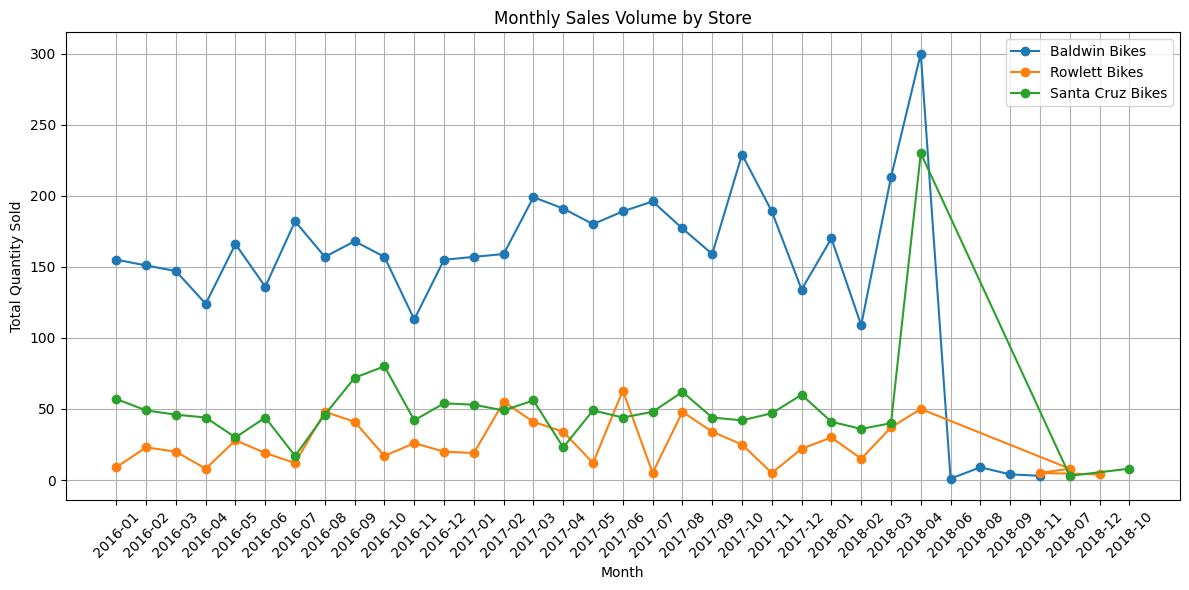

,store_name,month,total_quantity
0,Baldwin Bikes,2016-01,155
1,Baldwin Bikes,2016-02,151
2,Baldwin Bikes,2016-03,147
3,Baldwin Bikes,2016-04,124
4,Baldwin Bikes,2016-05,166
...,...,...,...
88,Santa Cruz Bikes,2018-02,36
89,Santa Cruz Bikes,2018-03,40
90,Santa Cruz Bikes,2018-04,230
91,Santa Cruz Bikes,2018-07,3


In [4]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.ClaudeAI)

Rephrasing prompt...
Generating SQL and Python code with LLM...
User query: sales order quantity trend monthly by store
Rephrased prompt: Analyze the monthly trend of sales order quantities for each store and recommend a line chart to visualize the changes over time.#
SQL:  
SELECT 
    strftime('%Y-%m', o.order_date) AS order_month,
    s.store_name,
    SUM(oi.quantity) AS total_quantity
FROM 
    orders o
JOIN 
    order_items oi ON o.order_id = oi.order_id
JOIN 
    stores s ON o.store_id = s.store_id
GROUP BY 
    order_month, s.store_name
ORDER BY 
    order_month, s.store_name;

PYTHON: 
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is the DataFrame containing the query result
df['order_month'] = pd.to_datetime(df['order_month'])

# Plotting
plt.figure(figsize=(12, 6))
for store in df['store_name'].unique():
    store_data = df[df['store_name'] == store]
    plt.plot(store_data['order_month'], store_data['total_quantity'], marker='o', label=store)

plt.xlabe

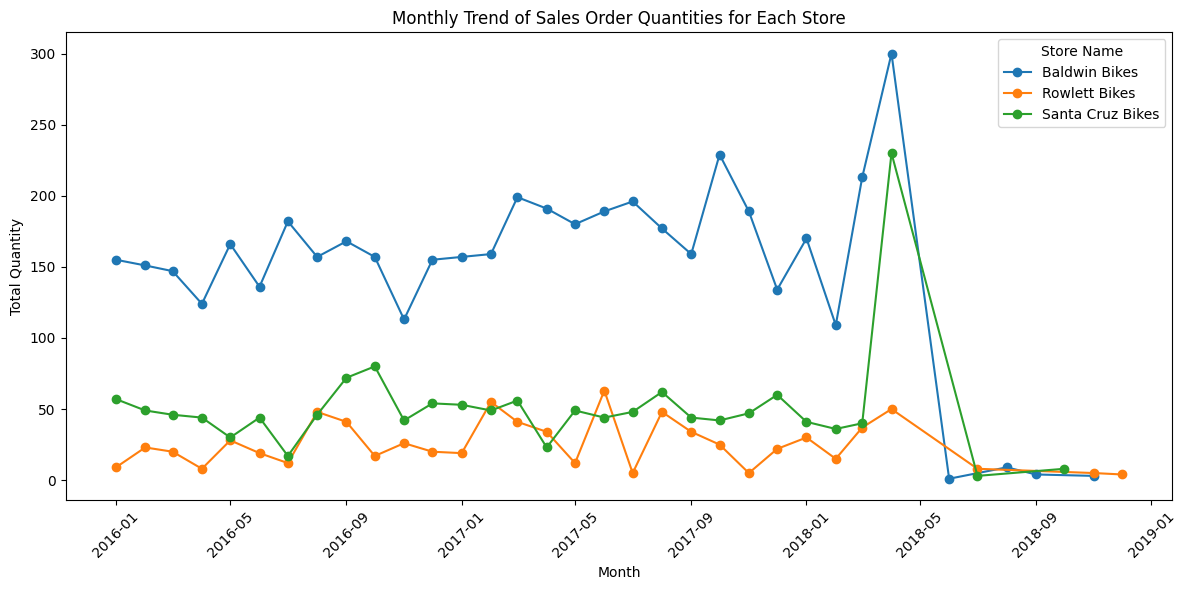

,order_month,store_name,total_quantity
0,2016-01-01,Baldwin Bikes,155
1,2016-01-01,Rowlett Bikes,9
2,2016-01-01,Santa Cruz Bikes,57
3,2016-02-01,Baldwin Bikes,151
4,2016-02-01,Rowlett Bikes,23
...,...,...,...
88,2018-09-01,Baldwin Bikes,4
89,2018-10-01,Santa Cruz Bikes,8
90,2018-11-01,Baldwin Bikes,3
91,2018-11-01,Rowlett Bikes,5


In [5]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.AzureOpenAI)

Rephrasing prompt...
Generating SQL and Python code with LLM...


Overwriting function "DatabaseDescriptor" in collection
Overwriting function "PythonFixer" in collection
Overwriting function "QuestionGenerator" in collection
Overwriting function "SQLFixer" in collection


User query: sales order quantity trend monthly by store
Rephrased prompt: Rephrased Prompt:
"Monthly sales order quantity trend analysis by store, ideally with a 막차(target and upper control limit) chart to visualize the moving range of orders across different stores, taking into account variations in sales volume and inventory levels. Please highlight any significant fluctuations or anomalies within the dataset".

Recommended Chart/Visualization:
- 막차 (Moving Range) Chart to analyze trends and outliers.
  + Displays the range of order quantities from one month to the next, helping to identify any irregularities or deviations in sales patterns.
- Store-wise comparison to gauge performance disparities and potential areas of growth or optimization.
- Possible inclusion of additional context such as seasonality, holidays, or major sales events for further insights.#
SQL:  
SELECT 
  s.store_id,
  s.store_name,
  AVG(o.order_id) AVG_Monthly_Sales,
  AVG(o.quantity) AVG_Monthly_Order_Quantit

Overwriting function "DatabaseDescriptor" in collection
Overwriting function "PythonFixer" in collection
Overwriting function "QuestionGenerator" in collection
Overwriting function "SQLFixer" in collection


User query: sales order quantity trend monthly by store
Rephrased prompt: Rephrased Prompt:
"Monthly sales order quantity trend analysis by store, ideally with a 막차(target and upper control limit) chart to visualize the moving range of orders across different stores, taking into account variations in sales volume and inventory levels. Please highlight any significant fluctuations or anomalies within the dataset".

Recommended Chart/Visualization:
- 막차 (Moving Range) Chart to analyze trends and outliers.
  + Displays the range of order quantities from one month to the next, helping to identify any irregularities or deviations in sales patterns.
- Store-wise comparison to gauge performance disparities and potential areas of growth or optimization.
- Possible inclusion of additional context such as seasonality, holidays, or major sales events for further insights.#
SQL:  
    SELECT 
        s.store_id,
        s.store_name,
        AVG(o.quantity) AS AVG_Monthly_Sales,
        AVG(o.quan

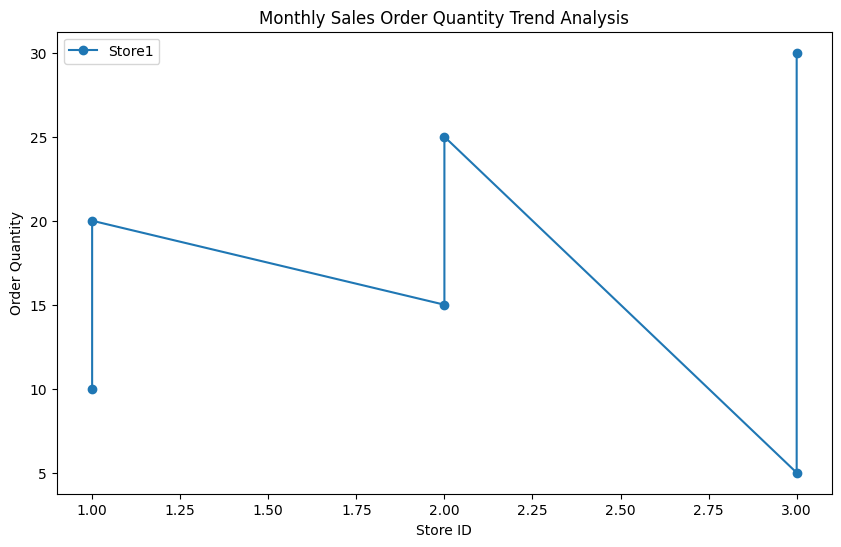

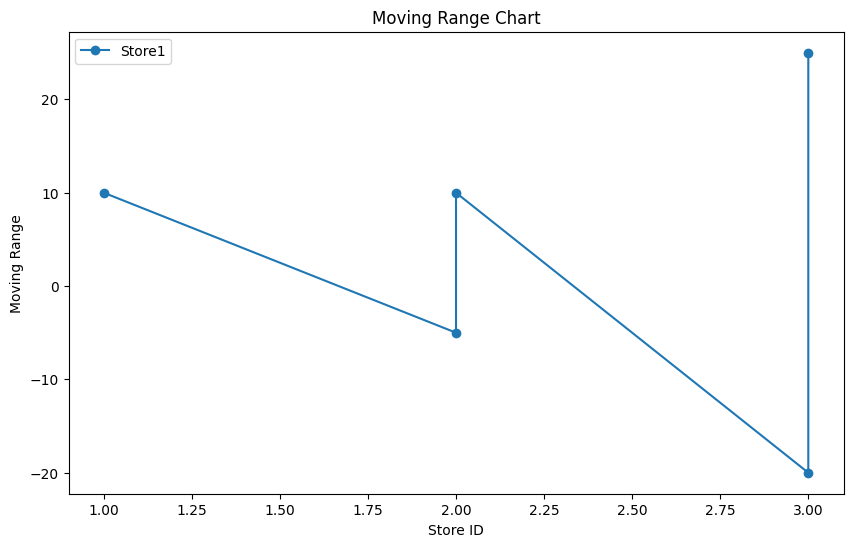

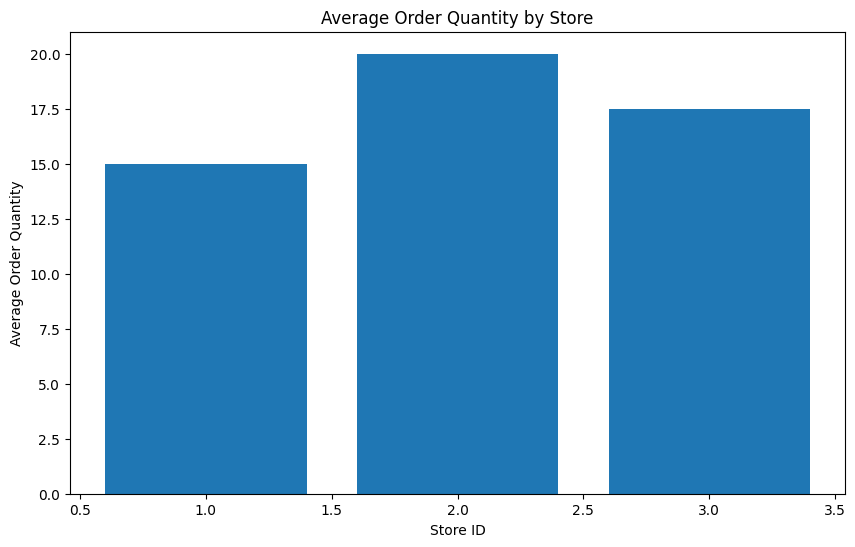

No DataFrame found.


In [6]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.HuggingFace, model_name="Llama318BInstruct", model_mode="chat")

In [7]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.HuggingFace, model_name="mistralaiMixtral8xbInstruct01", model_mode="chat")

Rephrasing prompt...
Generating SQL and Python code with LLM...


Overwriting function "DatabaseDescriptor" in collection
Overwriting function "PythonFixer" in collection
Overwriting function "QuestionGenerator" in collection
Overwriting function "SQLFixer" in collection
Error parsing XML of prompt: not well-formed (invalid token): line 135, column 106


User query: sales order quantity trend monthly by store
Rephrased prompt: with the following enhanced and clear prompt:

"Show me a monthly sales trend by store, based on the number of order items, for the past year."

To make the analysis more insightful, consider creating a stacked column chart or line chart to visualize the sales orders' quantity trend over time across different stores.#
SQL:  
SELECT EXTRACT(MONTH FROM order_date) as month, store_id, COUNT(order_id) as number_of_orders FROM orders&
 WHERE order_date >= date('now','-1 year') GROUP BY month, store_id

SQL fix Iteration:  2  Error:  Execution failed on sql '
SELECT EXTRACT(MONTH FROM order_date) as month, store_id, COUNT(order_id) as number_of_orders FROM orders&
 WHERE order_date >= date('now','-1 year') GROUP BY month, store_id
': near "FROM": syntax error


Overwriting function "DatabaseDescriptor" in collection
Overwriting function "PythonFixer" in collection
Overwriting function "QuestionGenerator" in collection
Overwriting function "SQLFixer" in collection
Error parsing XML of prompt: not well-formed (invalid token): line 135, column 106


User query: sales order quantity trend monthly by store
Rephrased prompt: with the following enhanced and clear prompt:

"Show me a monthly sales trend by store, based on the number of order items, for the past year."

To make the analysis more insightful, consider creating a stacked column chart or line chart to visualize the sales orders' quantity trend over time across different stores.#
SQL:  SELECT EXTRACT(MONTH FROM orders.order_date) as month, stores.store_name, COUNT(order_items.order_id) as number_of_orders
FROM orders
JOIN order_items ON orders.order_id = order_items.order_id
JOIN stores ON orders.store_id = stores.store_id
WHERE orders.order_date >= date('now','-1 year')
GROUP BY month, stores.store_name
SQL fix Iteration:  3  Error:  Execution failed on sql 'SELECT EXTRACT(MONTH FROM orders.order_date) as month, stores.store_name, COUNT(order_items.order_id) as number_of_orders
FROM orders
JOIN order_items ON orders.order_id = order_items.order_id
JOIN stores ON orders.stor

Overwriting function "DatabaseDescriptor" in collection
Overwriting function "PythonFixer" in collection
Overwriting function "QuestionGenerator" in collection
Overwriting function "SQLFixer" in collection
Error parsing XML of prompt: not well-formed (invalid token): line 135, column 106


User query: sales order quantity trend monthly by store
Rephrased prompt: with the following enhanced and clear prompt:

"Show me a monthly sales trend by store, based on the number of order items, for the past year."

To make the analysis more insightful, consider creating a stacked column chart or line chart to visualize the sales orders' quantity trend over time across different stores.#
SQL:  SELECT
EXTRACT(MONTH FROM o.order_date) as month,
s.store_name,
COUNT(oi.order_id) as number_of_orders
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN stores s ON o.store_id = s.store_id
WHERE o.order_date >= date('now','-1 year')
GROUP BY month, s.store_name
SQL fix Iteration:  4  Error:  Execution failed on sql 'SELECT
EXTRACT(MONTH FROM o.order_date) as month,
s.store_name,
COUNT(oi.order_id) as number_of_orders
FROM orders o
JOIN order_items oi ON o.order_id = oi.order_id
JOIN stores s ON o.store_id = s.store_id
WHERE o.order_date >= date('now','-1 year')
GROUP BY month,

Rephrasing prompt...
Generating SQL and Python code with LLM...
User query: sales order quantity trend monthly by store
Rephrased prompt: Show the monthly sales trend for order quantity per store.  A line chart is recommended. 
#
SQL:  
SELECT
  strftime('%Y-%m', o.order_date) AS order_month,
  s.store_name,
  SUM(oi.quantity) AS total_quantity
FROM orders AS o
JOIN order_items AS oi
  ON o.order_id = oi.order_id
JOIN stores AS s
  ON o.store_id = s.store_id
GROUP BY
  1,
  2
ORDER BY
  1,
  2;

PYTHON: 
import pandas as pd
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['order_month'], df['total_quantity'], label=df['store_name'].unique())
plt.xlabel('Order Month')
plt.ylabel('Total Quantity')
plt.title('Monthly Sales Trend for Order Quantity per Store')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



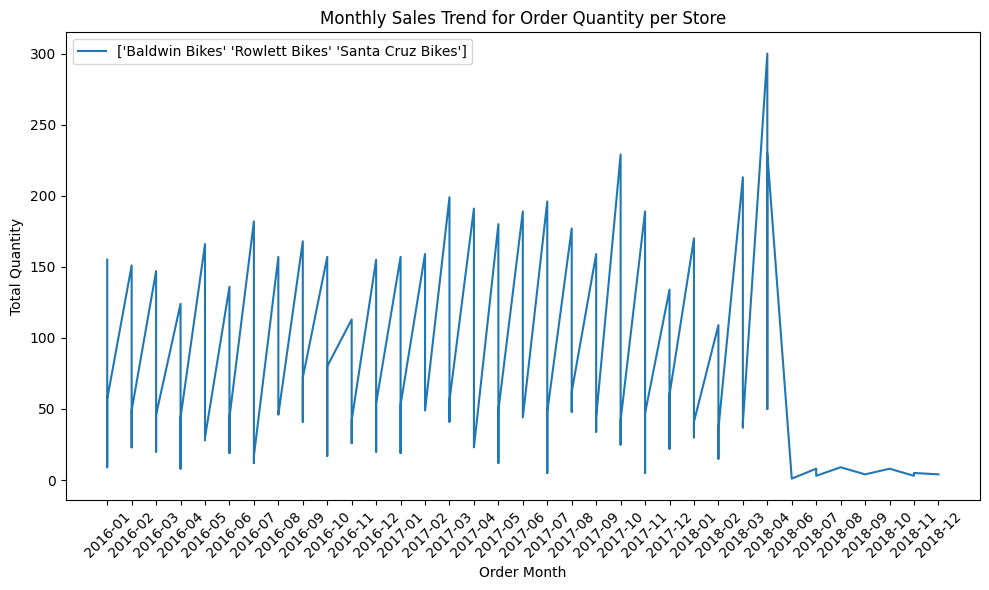

,order_month,store_name,total_quantity
0,2016-01,Baldwin Bikes,155
1,2016-01,Rowlett Bikes,9
2,2016-01,Santa Cruz Bikes,57
3,2016-02,Baldwin Bikes,151
4,2016-02,Rowlett Bikes,23
...,...,...,...
88,2018-09,Baldwin Bikes,4
89,2018-10,Santa Cruz Bikes,8
90,2018-11,Baldwin Bikes,3
91,2018-11,Rowlett Bikes,5


In [8]:
await PromptToQueryResult(prompt_rephrase=True, debug=True ,selected_service=Service.Gemini)